<>:19: SyntaxWarning: invalid escape sequence '\$'
<>:19: SyntaxWarning: invalid escape sequence '\$'
C:\Users\julie\AppData\Local\Temp\ipykernel_4188\2688246231.py:19: SyntaxWarning: invalid escape sequence '\$'
  df['Price'] = df['Price'].replace('[\$,]', '', regex=True).astype(


Epoch [100/5000], Loss: 367836800.0000
Epoch [200/5000], Loss: 364628704.0000
Epoch [300/5000], Loss: 355160864.0000
Epoch [400/5000], Loss: 336499584.0000
Epoch [500/5000], Loss: 307298464.0000
Epoch [600/5000], Loss: 268341504.0000
Epoch [700/5000], Loss: 222877408.0000
Epoch [800/5000], Loss: 175303520.0000
Epoch [900/5000], Loss: 132475160.0000
Epoch [1000/5000], Loss: 99537584.0000
Epoch [1100/5000], Loss: 77982696.0000
Epoch [1200/5000], Loss: 65743016.0000
Epoch [1300/5000], Loss: 59263096.0000
Epoch [1400/5000], Loss: 55673420.0000
Epoch [1500/5000], Loss: 53465548.0000
Epoch [1600/5000], Loss: 52008712.0000
Epoch [1700/5000], Loss: 50942472.0000
Epoch [1800/5000], Loss: 50099188.0000
Epoch [1900/5000], Loss: 49421400.0000
Epoch [2000/5000], Loss: 48818000.0000
Epoch [2100/5000], Loss: 48275616.0000
Epoch [2200/5000], Loss: 47776732.0000
Epoch [2300/5000], Loss: 47319880.0000
Epoch [2400/5000], Loss: 46906456.0000
Epoch [2500/5000], Loss: 46510664.0000
Epoch [2600/5000], Loss: 

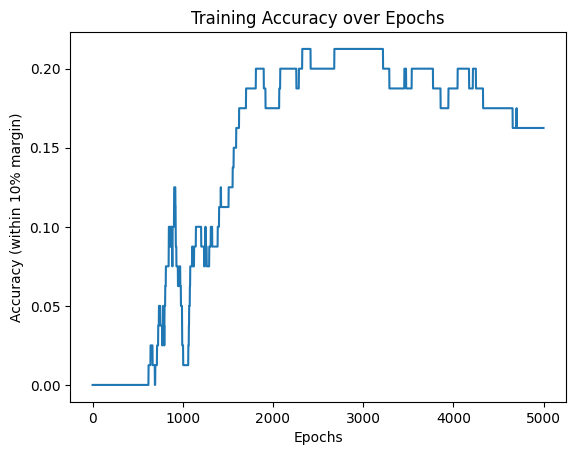

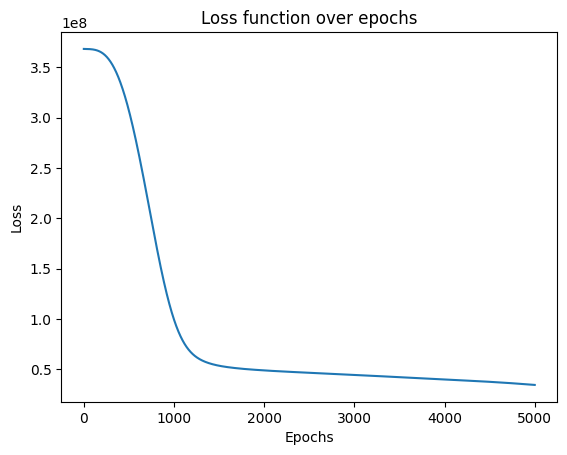

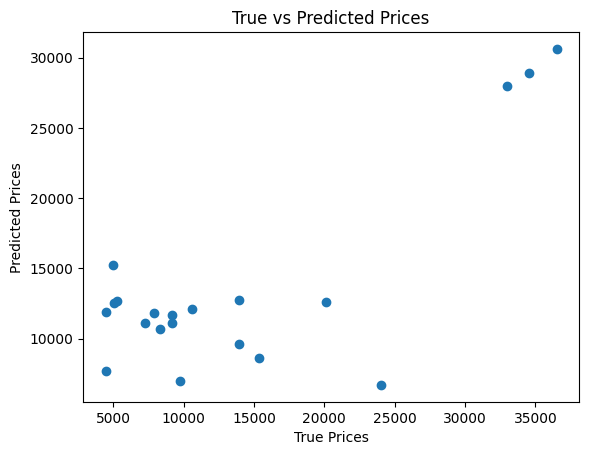

In [5]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('car-sales.csv')


df = pd.DataFrame(data)

# Prétraitement des données
df['Price'] = df['Price'].replace('[\$,]', '', regex=True).astype(
    float)  # Enlever les signes "$" et convertir en float
le_make = LabelEncoder()
df['Make'] = le_make.fit_transform(df['Make'])
le_color = LabelEncoder()
df['Colour'] = le_color.fit_transform(df['Colour'])

# Séparer les caractéristiques et la cible
X = df[['Make', 'Colour', 'Odometer (KM)', 'Doors']]
y = df['Price']

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convertir les données en tenseurs PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)
losses = []
accuracies = []


# 2. Construction du modèle PyTorch ANN


class CarPriceANN(nn.Module):
    def __init__(self):
        super(CarPriceANN, self).__init__()
        self.fc1 = nn.Linear(4, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# Instancier le modèle
model = CarPriceANN()

# 3. Optimisation et entraînement

# Définir la fonction de perte et l'optimiseur
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Entraîner le modèle
epochs = 5000
losses = []

for epoch in range(epochs):
    model.train()  # Mettre le modèle en mode entraînement

    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass et optimisation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Stocker la loss pour la visualisation
    losses.append(loss.item())

    # Calcul de l'accuracy (proportion d'exemples avec une erreur < 10% de la vraie valeur)
    with torch.no_grad():
        model.eval()  # Mettre le modèle en mode évaluation
        y_pred_train = model(X_train_tensor)
        accuracy = (torch.abs((y_train_tensor - y_pred_train) /
                    y_train_tensor) < 0.1).float().mean().item()
        accuracies.append(accuracy)
        
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

# 4. Évaluation du modèle

model.eval()  # Mettre le modèle en mode évaluation
with torch.no_grad():
    y_pred = model(X_test_tensor)

# Calculer les métriques d'évaluation
mse = mean_squared_error(y_test_tensor, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

# Visualisation de l'accuracy
plt.plot(accuracies)
plt.title('Training Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (within 10% margin)')
plt.show()

# Visualiser la loss pendant l'entraînement
plt.plot(losses)
plt.title('Loss function over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Comparer les valeurs prédites avec les vraies valeurs
y_test_np = y_test_tensor.numpy()
y_pred_np = y_pred.numpy()

plt.scatter(y_test_np, y_pred_np)
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.title('True vs Predicted Prices')
plt.show()

In [7]:
input_cars = pd.DataFrame({
    "Make": ["Toyota", "BMW", "Honda"],
    "Colour": ["Red", "Black", "Blue"],
    "Odometer (KM)": [120000, 5000, 60000],
    "Doors": [4, 5, 4]
})

# Encoder les entrées similaires au processus initial
input_cars['Make'] = le_make.transform(input_cars['Make'])
input_cars['Colour'] = le_color.transform(input_cars['Colour'])

# Normaliser les données en fonction des données d'entraînement
input_cars_scaled = scaler.transform(input_cars)

# Convertir en tenseur PyTorch
input_cars_tensor = torch.tensor(input_cars_scaled, dtype=torch.float32)

# Faire les prédictions
model.eval()
with torch.no_grad():
    predicted_prices = model(input_cars_tensor)

# Afficher les prix prédites
predicted_prices_numpy = predicted_prices.numpy().flatten()
# Afficher les prix prédites avec le symbole Euro
predicted_prices_euro = [f"€{price:.2f}" for price in predicted_prices_numpy]
predicted_prices_euro

['€7244.21', '€21556.57', '€11526.98']

Essayons d'autre classifiers par Scikitlearn

<>:15: SyntaxWarning: invalid escape sequence '\$'
<>:15: SyntaxWarning: invalid escape sequence '\$'
C:\Users\julie\AppData\Local\Temp\ipykernel_4188\2635795265.py:15: SyntaxWarning: invalid escape sequence '\$'
  df['Price'] = df['Price'].replace('[\$,]', '', regex=True).astype(


Linear Regression:
 - Mean Squared Error: 72164985.5388
 - R² (coefficient de détermination): 0.2921

Ridge Regression:
 - Mean Squared Error: 71858519.6504
 - R² (coefficient de détermination): 0.2951

Lasso Regression:
 - Mean Squared Error: 72163127.5336
 - R² (coefficient de détermination): 0.2921

ElasticNet Regression:
 - Mean Squared Error: 70919606.0272
 - R² (coefficient de détermination): 0.3043

Random Forest Regressor:
 - Mean Squared Error: 16334589.7408
 - R² (coefficient de détermination): 0.8398



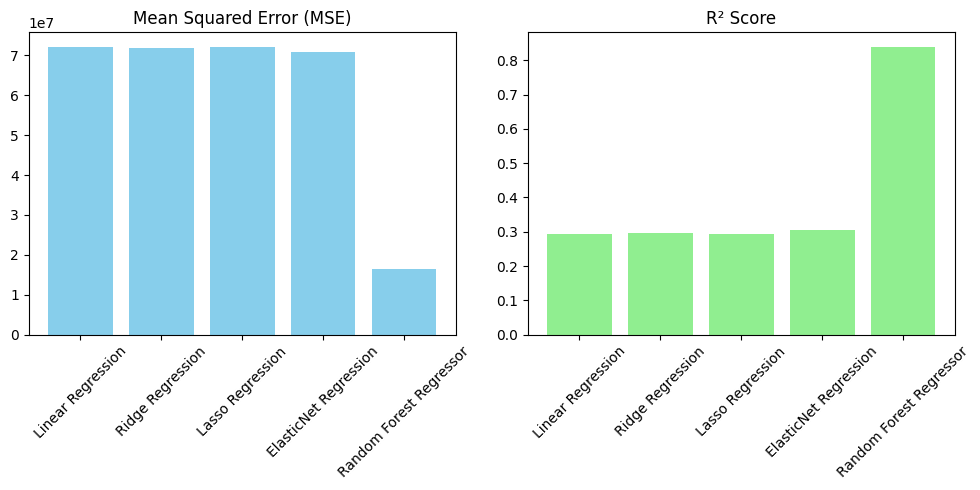

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Charger les données
data = pd.read_csv('car-sales.csv')
df = pd.DataFrame(data)

# Prétraitement des données
df['Price'] = df['Price'].replace('[\$,]', '', regex=True).astype(
    float)  # Enlever les signes "$" et convertir en float
le_make = LabelEncoder()
df['Make'] = le_make.fit_transform(df['Make'])
le_color = LabelEncoder()
df['Colour'] = le_color.fit_transform(df['Colour'])

# Séparer les caractéristiques et la cible
X = df[['Make', 'Colour', 'Odometer (KM)', 'Doors']]
y = df['Price']

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Liste des modèles de régression à tester
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42)
}

# Entraîner et évaluer chaque modèle
results = {}

for name, model in models.items():
    # Entraîner le modèle
    model.fit(X_train, y_train)

    # Faire des prédictions
    y_pred = model.predict(X_test)

    # Calculer MSE et R²
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Stocker les résultats
    results[name] = {
        "MSE": mse,
        "R²": r2
    }

# Afficher les résultats pour chaque modèle
for name, metrics in results.items():
    print(f"{name}:")
    print(f" - Mean Squared Error: {metrics['MSE']:.4f}")
    print(f" - R² (coefficient de détermination): {metrics['R²']:.4f}\n")

# Visualisation des résultats
models_names = list(results.keys())
mse_values = [metrics['MSE'] for metrics in results.values()]
r2_values = [metrics['R²'] for metrics in results.values()]

plt.figure(figsize=(10, 5))

# Visualisation du MSE
plt.subplot(1, 2, 1)
plt.bar(models_names, mse_values, color='skyblue')
plt.title('Mean Squared Error (MSE)')
plt.xticks(rotation=45)

# Visualisation du R²
plt.subplot(1, 2, 2)
plt.bar(models_names, r2_values, color='lightgreen')
plt.title('R² Score')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Charger les données
data = {
    'Make': ['Toyota', 'Honda', 'Toyota', 'BMW', 'Nissan', 'Toyota', 'Honda', 'Honda', 'Toyota', 'Nissan'],
    'Colour': ['White', 'Red', 'Blue', 'Black', 'White', 'Green', 'Blue', 'Blue', 'White', 'White'],
    'Odometer (KM)': [150043, 87899, 32549, 11179, 213095, 99213, 45698, 54738, 60000, 31600],
    'Doors': [4, 4, 3, 5, 4, 4, 4, 4, 4, 4],
    'Price': ['$4,000.00', '$5,000.00', '$7,000.00', '$22,000.00', '$3,500.00', '$4,500.00', '$7,500.00', '$7,000.00', '$6,250.00', '$9,700.00']
}

df = pd.DataFrame(data)

# Prétraitement des données
df['Price'] = df['Price'].replace('[\$,]', '', regex=True).astype(
    float)  # Enlever les signes "$" et convertir en float
le_make = LabelEncoder()
df['Make'] = le_make.fit_transform(df['Make'])
le_color = LabelEncoder()
df['Colour'] = le_color.fit_transform(df['Colour'])

# Séparer les caractéristiques et la cible
X = df[['Make', 'Colour', 'Odometer (KM)', 'Doors']]
y = df['Price']

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entraîner le modèle RandomForest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Calculer R² et RMSE
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Afficher R² et RMSE
print(f"R² (Coefficient de détermination): {r2:.4f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")

# Prédire les prix pour 10 nouvelles voitures
new_cars = pd.DataFrame({
    'Make': ['Toyota', 'BMW', 'Honda', 'Nissan', 'Toyota', 'BMW', 'Honda', 'Nissan', 'Toyota', 'Honda'],
    'Colour': ['Red', 'Black', 'Blue', 'White', 'Green', 'Blue', 'Black', 'White', 'Red', 'Green'],
    'Odometer (KM)': [120000, 5000, 80000, 40000, 150000, 25000, 60000, 90000, 110000, 130000],
    'Doors': [4, 5, 4, 4, 4, 5, 4, 3, 4, 4]
})

# Encoder et normaliser les nouvelles données
new_cars['Make'] = le_make.transform(new_cars['Make'])
new_cars['Colour'] = le_color.transform(new_cars['Colour'])
new_cars_scaled = scaler.transform(new_cars)

# Faire des prédictions pour les nouvelles voitures
predicted_prices = model.predict(new_cars_scaled)

# Afficher les prix prédits pour les nouvelles voitures
for i, price in enumerate(predicted_prices, 1):
    print(f"Voiture {i}: €{price:.2f}")

R² (Coefficient de détermination): -1.1485
RMSE (Root Mean Squared Error): 916.11
Voiture 1: €4663.00
Voiture 2: €16116.00
Voiture 3: €5789.00
Voiture 4: €7780.00
Voiture 5: €4405.00
Voiture 6: €12027.00
Voiture 7: €9908.00
Voiture 8: €5352.00
Voiture 9: €4663.00
Voiture 10: €4672.00


<>:20: SyntaxWarning: invalid escape sequence '\$'
<>:20: SyntaxWarning: invalid escape sequence '\$'
C:\Users\julie\AppData\Local\Temp\ipykernel_12320\380088524.py:20: SyntaxWarning: invalid escape sequence '\$'
  df['Price'] = df['Price'].replace('[\$,]', '', regex=True).astype(
